In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data
<font size="4">To read the data, we use the read_csv command from the Pandas library.</font>

In [2]:


training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')



# Data Analysis
<font size="4">To examine and analyze the shape of the data, their distribution, and their impact on the survival rate, we used plotting functions from the Seaborn and Matplotlib libraries. To visualize the nature of the data, we used the info() and describe() functions from the Pandas library.</font>

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
#We check the distribution of 0/1 values in the 'Survived' column for the training dataset.
number_of_survivors = len(training_data.loc[training_data['Survived'] == 1])
number_of_deceased = len(training_data.loc[training_data['Survived'] == 0])
print("The percentage of passengers who survived: {0:.2f}%".format(number_of_survivors/len(training_data.index)*100))
print("The percentage of passengers who perished: {0:.2f}%".format(number_of_deceased/len(training_data.index)*100))

The percentage of passengers who survived: 38.38%
The percentage of passengers who perished: 61.62%


<font size="3">From the output of the info function, I observe that there are 2 missing values in the 'Embarked' column, 177 missing values in the 'Age' column, and 687 missing values in the 'Cabin' column. I will address these cases when I begin to manipulate the data. For now, I will plot graphs for each column individually to identify any correlations between the data and the survival rate. </font>

# Passenger class
<font size="3">We observe that passengers in the first and second classes have a significantly higher chance of survival compared to those in the third class. This could be partly due to the cabin allocation, as cabins in the third class are located on the lower decks.</font>

C:\Users\danut\AppData\Local\Temp\ipykernel_14484\390655143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=training_data,palette="Blues")


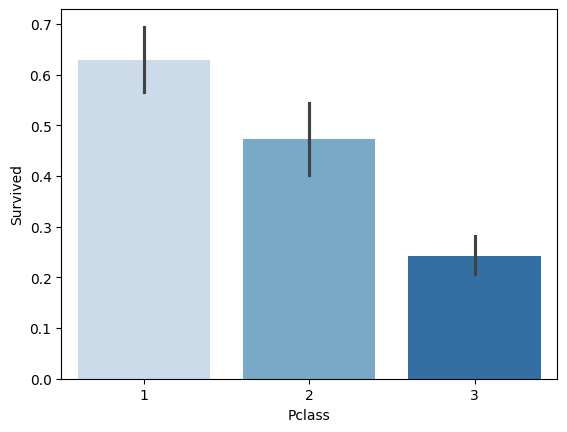

In [7]:
sns.barplot(x='Pclass', y='Survived', data=training_data,palette="Blues")
plt.show()

# Passenger gender
<font size="3">From the graph, we observe the relevance of passenger gender with respect to the survival rate, with females having a significantly higher survival rate.</font>

C:\Users\danut\AppData\Local\Temp\ipykernel_14484\897416352.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=training_data,palette="Blues")


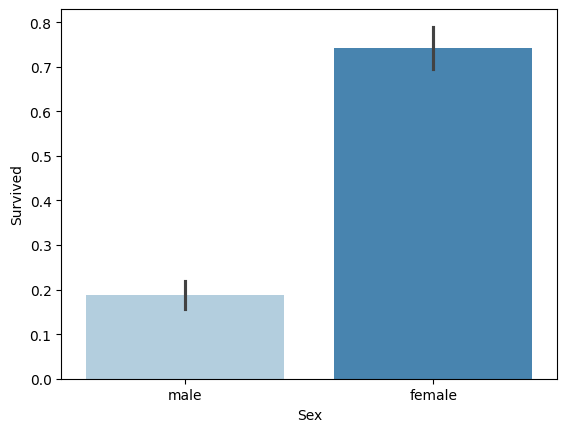

In [8]:
sns.barplot(x='Sex', y='Survived', data=training_data,palette="Blues")
plt.show()

In [9]:
training_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Age
<font size = "3">We observe that men between the ages of 25 and 35 had the highest chances of survival, as well as those between 0 and 5 years old. For women, the age groups between 20 and 30 and between 35 and 50 had lower chances of survival. Additionally, to fill in the missing values, I will generate random numbers using the mean and standard deviation.</font>

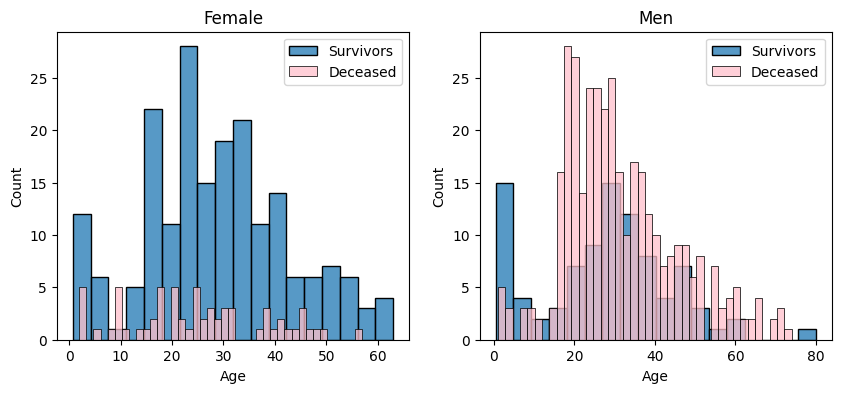

In [10]:
survivors = 'Survivors'
deceased = 'Deceased'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
female = training_data[training_data['Sex']=='female']
men = training_data[training_data['Sex']=='male']
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=18, label = survivors, ax = axes[0], kde =False)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=40, label = deceased, ax = axes[0], kde =False, color = 'Pink')
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survivors, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = deceased, ax = axes[1], kde = False, color = 'Pink')
ax.legend()
_ = ax.set_title('Men')
plt.show()

# SibSp
<font size="3">SibSp contains the number of siblings/spouses aboard the Titanic. We observe that the chances of survival increase up to a value of 2, and then decrease, indicating that a larger family size of more than 3 people tends to have lower chances of survival.</font>

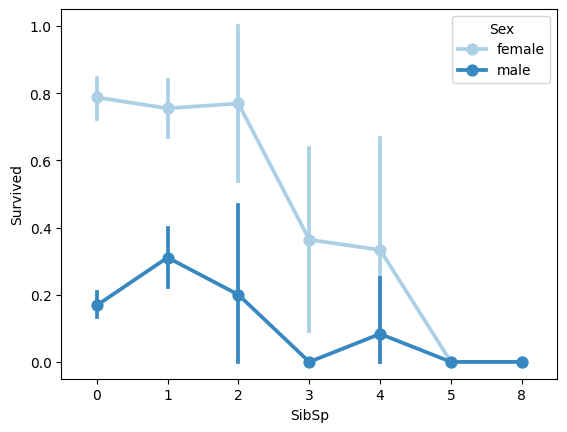

In [11]:
sns.pointplot(x = "SibSp", y = "Survived", hue="Sex", data=training_data, palette="Blues")
plt.show()

# Parch
<font size="3">Parch represents the number of parents/children the person has aboard. From the graph, we observe the same trend as with the SibSp column. Therefore, we could combine these into a single column called Relatives and examine its impact.</font>

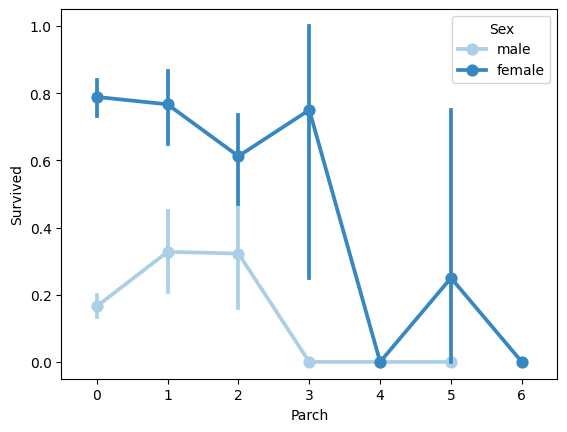

In [12]:
sns.pointplot(x = "Parch", y = "Survived", hue="Sex", data=training_data,palette="Blues")
plt.show()

# Ticket
<font size = "3">In the case of the ticket number, there are too many unique values. Therefore, this column does not provide useful information for training the model, so I will omit it.</font>

In [13]:
training_data['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

# Fare
<font size = "3">From the graph, we observe a large number of values between 0 and 50. This can be attributed to the distribution of passengers across classes: 324 passengers in first class, 284 in second class, and 709 in third class, with ticket prices reflecting this distribution. </font>

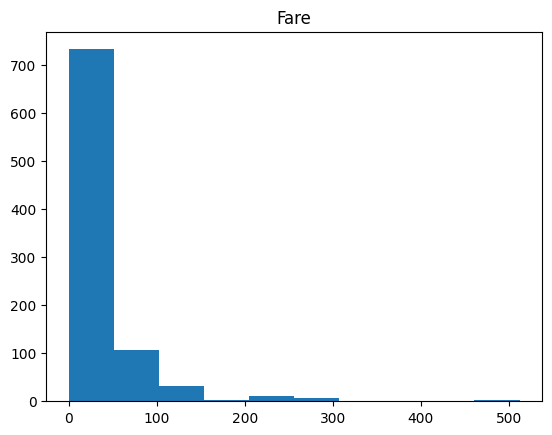

In [14]:
plt.hist(x = training_data['Fare'])
plt.title('Fare')
plt.show()

# Cabin
<font size = "3"> Since 77% of the data in this column is missing, I will choose to omit it. </font>

In [15]:
print("The percentage of missing values in the 'Cabin' column is: {0:.2f}%".format(training_data["Cabin"].isnull().sum()/len(training_data.index)*100))

The percentage of missing values in the 'Cabin' column is: 77.10%


# Embarked
<font size = "3">We observe that passengers who boarded in Cherbourg had higher chances of survival, while those who boarded in Southampton had the lowest chances of survival. Additionally, to address the 2 missing values, I will assume that these passengers boarded in Southampton, the most frequent value.</font>

In [16]:
number_of_survivors_S = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'S')].index)
number_of_survivors_C = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'C')].index)
number_of_survivors_Q = len(training_data[(training_data.Survived == 1) & (training_data.Embarked == 'Q')].index)
number_of_deceased_S = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'S')].index)
number_of_deceased_C = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'C')].index)
number_of_deceased_Q = len(training_data[(training_data.Survived == 0) & (training_data.Embarked == 'Q')].index)
print("The percentage of passengers boarded in Southampton who survived: {0:.2f}%".format(number_of_survivors_S/(number_of_survivors_S + number_of_deceased_S)*100))
print("The percentage of passengers boarded in Cherbourg who survived: {0:.2f}%".format(number_of_survivors_C/(number_of_survivors_C + number_of_deceased_C)*100))
print("The percentage of passengers boarded in Queenstown who survived: {0:.2f}%".format(number_of_survivors_Q/(number_of_survivors_Q + number_of_deceased_Q)*100))

The percentage of passengers boarded in Southampton who survived: 33.70%
The percentage of passengers boarded in Cherbourg who survived: 55.36%
The percentage of passengers boarded in Queenstown who survived: 38.96%


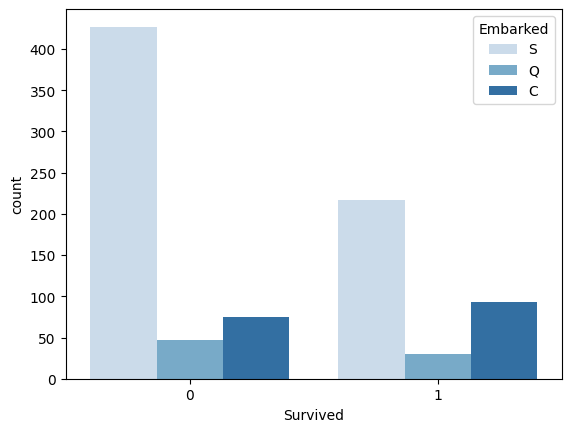

In [17]:
sns.countplot( x='Survived', data=training_data, hue="Embarked",palette="Blues")
plt.show()

# Name
<font size = "3"> We notice that we could extract the title of the person from the name, such as Mr, Mrs, etc.</font>

In [18]:
training_data.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

# Data cleaning
<font size = "3"> We begin by addressing the null values and omitting the 'Cabin' and 'Ticket' columns. I will apply these changes to both the training and test datasets. For the 'Embarked' column, I will fill the null values with 'S', as this is where the majority of passengers boarded. Additionally, I will convert all text values to numeric values, as certain algorithms do not support mixed data types.
</font>

In [19]:
training_data.Embarked = training_data.Embarked.fillna('S')

training_data.replace({'male': 0, 'female': 1}, inplace=True)
training_data = training_data.infer_objects(copy=False)

test_data.replace({'male': 0, 'female': 1}, inplace=True)
test_data = test_data.infer_objects(copy=False)

training_data.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
training_data = training_data.infer_objects(copy=False)

test_data.replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
test_data = test_data.infer_objects(copy=False)

C:\Users\danut\AppData\Local\Temp\ipykernel_14484\3867508985.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data.replace({'male': 0, 'female': 1}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_14484\3867508985.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'male': 0, 'female': 1}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_14484\3867508985.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

In [20]:
training_data = training_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)
training_data = training_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [21]:
#training_data['Fare'] = training_data['Fare'].fillna(training_data.Fare.median()).astype(int)
training_data['Fare'] = training_data['Fare'].fillna(training_data['Fare'].median()).astype(int)


#test_data['Fare'] = test_data['Fare'].fillna(test_data.Fare.median()).astype(int)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median()).astype(int)

#training_data['Age'] = training_data['Age'].fillna(method = 'pad').astype(int)
training_data['Age'] = training_data['Age'].ffill().astype(int)

#test_data['Age'] = test_data['Age'].fillna(method = 'pad').astype(int)
test_data['Age'] = test_data['Age'].ffill().astype(int)

In [22]:
#We check if there are any remaining null values.
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Fare         891 non-null    int64 
 9   Embarked     891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB


In [23]:
#training_data.corr().abs()[["Survived"]]

numeric_columns = training_data.select_dtypes(include=['number'])

# Calculate the absolute correlation with the 'Survived' column
correlation_matrix = numeric_columns.corr().abs()[["Survived"]]

# Display the result
print(correlation_matrix)

             Survived
PassengerId  0.005007
Survived     1.000000
Pclass       0.338481
Sex          0.543351
Age          0.065452
SibSp        0.035322
Parch        0.081629
Fare         0.257482
Embarked     0.106811


In [24]:

numeric_columns = training_data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_columns.corr()

# Apply background gradient styling
styled_corr = corr.style.background_gradient(cmap='coolwarm')

# Display the result (this will only work in a Jupyter notebook or similar environment)
styled_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.026624,-0.057527,-0.001652,0.012668,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.065452,-0.035322,0.081629,0.257482,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.291179,0.083081,0.018443,-0.550553,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.057963,0.114631,0.245489,0.182331,0.116569
Age,0.026624,-0.065452,-0.291179,-0.057963,1.000000,-0.205739,-0.165233,0.083713,0.023940
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.205739,1.000000,0.414838,0.159506,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.165233,0.414838,1.000000,0.216252,-0.078665
Fare,0.012668,0.257482,-0.550553,0.182331,0.083713,0.159506,0.216252,1.000000,0.061061
Embarked,-0.030467,0.106811,0.045702,0.116569,0.023940,-0.059961,-0.078665,0.061061,1.000000


# Data manipulation
<font size = "3"> We extract the title from the name and combine SibSp with Parch. We convert all text data into numeric values, apply a logarithmic transformation to the Fare column, and implement a data normalization algorithm.
</font>

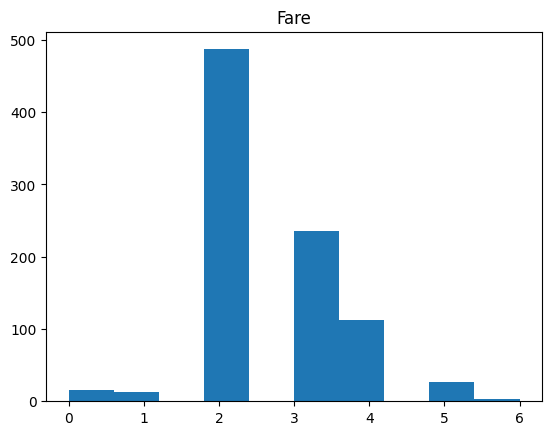

In [25]:
#logaritmez coloana fare
training_data['Fare'] = np.log(training_data.Fare+1).astype(int)
test_data['Fare'] = np.log(test_data.Fare+1).astype(int)
plt.hist(x = training_data['Fare'])
plt.title('Fare')
plt.show()

In [26]:
#We extract only the titles from the names and then remove the 'Name' column.
training_data['Title'] = training_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training_data = training_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [27]:
training_data['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [28]:
#We consolidate special titles under a single definition, namely "Others."
training_data.replace({'Master': 'Master','Mrs': 'Mrs','Miss': 'Miss','Mr': 'Mr','Dr': 'Altele', 'Rev': 'Altele', 'Mlle' : 'Altele', 'Major' : 'Altele', 'Col' : 'Altele', 'Lady' : 'Altele', 'Don' : 'Altele', 'Mme' : 'Altele', 'Ms' : 'Altele', 'the Countess' : 'Altele', 'Sir' : 'Altele', 'Capt' : 'Altele', 'Jonkheer' : 'Altele', 'Dona':'Altele'}, inplace=True)
test_data.replace({'Master': 'Master','Mrs': 'Mrs','Miss': 'Miss','Mr': 'Mr','Dr': 'Altele', 'Rev': 'Altele', 'Mlle' : 'Altele', 'Major' : 'Altele', 'Col' : 'Altele', 'Lady' : 'Altele', 'Don' : 'Altele', 'Mme' : 'Altele', 'Ms' : 'Altele', 'the Countess' : 'Altele', 'Sir' : 'Altele', 'Capt' : 'Altele', 'Jonkheer' : 'Altele', 'Dona':'Altele'}, inplace=True)

In [29]:
#We transform the text into numeric values.

training_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)
training_data = training_data.infer_objects(copy=False)
test_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)
test_data = test_data.infer_objects(copy=False)

C:\Users\danut\AppData\Local\Temp\ipykernel_14484\662704483.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)
C:\Users\danut\AppData\Local\Temp\ipykernel_14484\662704483.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Mr' : 0, 'Miss' : 1, 'Mrs': 2, 'Master' : 3, 'Altele' : 4}, inplace=True)


In [30]:
final_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch' ,'Fare', 'Title']
X_test = test_data[final_columns]
X_train = training_data[final_columns]
y_train = training_data['Survived']
training_data = training_data[final_columns]

In [31]:
#Data normalization
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
normalizator = MinMaxScaler()
X_train = normalizator.fit_transform(X_train)
X_test = normalizator.fit_transform(X_test)

In [32]:
from sklearn.model_selection import train_test_split
#We split the existing training data into training data and validation data.
X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

# Model selection
<font size = "3"> I will test several models with default values, from which I will select the top 3 and improve them using hyperparameters. With these models, I will make predictions. Additionally, I will use ensemble methods such as soft voting and hard voting.
</font>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

In [34]:
#Naive Bayes
gaussian_nb = GaussianNB()
cv = cross_val_score(gaussian_nb, X_train, y_train, cv=5)
print(cv.mean())

0.7991212102190697


In [35]:
#Support Vector Classifier
svc = SVC(probability=True)
cv = cross_val_score(svc, X_train, y_train ,cv=5)
print(cv.mean())

0.8282593685267716


In [36]:
#K-Nearest Neighbors
KNN = KNeighborsClassifier()
cv = cross_val_score(KNN,X_train,y_train,cv=5)
print(cv.mean())

0.8193459293201932


In [37]:
#Random Forest
RF = RandomForestClassifier()
cv = cross_val_score(RF,X_train,y_train,cv=5)
print(cv.mean())

0.8002510827945516


In [38]:
#Logistic Regression
LR = LogisticRegression()
cv = cross_val_score(LR,X_train,y_train,cv=5)
print(cv.mean())

0.7957315924926245


In [39]:
#Decision Tree Classifier
DTC = DecisionTreeClassifier()
cv = cross_val_score(DTC,X_train,y_train,cv=5)
print(cv.mean())

0.7890025735986441


In [40]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [41]:
knn = KNeighborsClassifier()
parameters = {
                'n_neighbors' : [3,5,7,9,11],
                'weights' : ['uniform', 'distance'],
                'algorithm' : ['auto', 'ball_tree','kd_tree', 'brute'],
                'p' : [1,2]
            }
gs_knn = GridSearchCV(knn, param_grid = parameters, verbose = True, n_jobs = -1)
knn = gs_knn.fit(X_train,y_train)
print('The best performance: ' + str(knn.best_score_))
print("The optimal parameters: " + str(knn.best_params_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
The best performance: 0.8238277572029377
The optimal parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [42]:
svc = SVC(probability=True)
parameters = [
                {'kernel': ['rbf'], 'gamma': [.1, .5, .75, 1, 1.25, 2, 2.5], 'C': [.1, .25, .5, .75, 1, 10]},
                {'kernel': ['linear'], 'C': [.1,.25, .5, .75, 1, 10]},
                {'kernel': ['poly'], 'degree' : [1,2,3,4,5], 'C': [.1, .25, .5, .75, 1, 10]}
            ]
gs_svc = GridSearchCV(svc, param_grid = parameters, verbose = True, n_jobs = -1)
svc = gs_svc.fit(X_train,y_train)
print('The best performance: ' + str(svc.best_score_))
print("The optimal parameters: " + str(svc.best_params_))

Fitting 5 folds for each of 78 candidates, totalling 390 fits
The best performance: 0.8327600276191074
The optimal parameters: {'C': 0.75, 'gamma': 2, 'kernel': 'rbf'}


In [43]:
lr = LogisticRegression()
parameters = {
                'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-2, 2, 30),
                'solver' : ['liblinear'],
                'max_iter' : [2000]
            }
gs_lr = GridSearchCV(lr, param_grid = parameters, verbose = True, n_jobs = -1)
lr = gs_lr.fit(X_train, y_train)
print("The best performance: " + str(lr.best_score_))
print("The optimal parameters: " + str(lr.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best performance: 0.7957378695624883
The optimal parameters: {'C': np.float64(1.6102620275609392), 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [44]:
rf = RandomForestClassifier(random_state = 1)
parameters = {
                'n_estimators': [100,250,500,750,1000], 
                'bootstrap': [True,False],
                'max_depth': [5,10,20,50,75,100,None],
                'max_features': ['auto','sqrt'],
                'min_samples_leaf': [1,2,5,10],
                'min_samples_split': [2,5,10]
            }
                                  
rf_randomized = RandomizedSearchCV(rf, param_distributions = parameters, n_iter = 100, verbose = True, n_jobs = -1)
best_rf_randomized = rf_randomized.fit(X_train,y_train)
print("The best performance:" + str(best_rf_randomized.best_score_))
print("The optimal parameters: " + str(best_rf_randomized.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

The best performance:0.8249074132195092
The optimal parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}


In [45]:
rf = RandomForestClassifier()
parameters = {
                'n_estimators': [700,750,800],
                'criterion': ['gini' , 'entropy'],
                'bootstrap': [False],
                'max_depth': [4,5,6],
                'max_features': ['log2','sqrt'],
                'min_samples_leaf': [1,2],
                'min_samples_split': [5,6]
            }
                                  
gs_rf = GridSearchCV(rf, param_grid = parameters, verbose = True, n_jobs = -1)
rf = gs_rf.fit(X_train,y_train)
print("The best performance: " + str(rf.best_score_))
print("The optimal parameters: " + str(rf.best_params_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\danut\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The best performance: 0.8305128366078716
The optimal parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 750}


In [46]:
knn_final = knn.best_estimator_
svc_final = svc.best_estimator_
rf_final = rf.best_estimator_

In [47]:
vot_hard = VotingClassifier(estimators = [('knn',knn_final),('rf',rf_final),('svc',svc_final)], voting = 'hard') 
vot_soft = VotingClassifier(estimators = [('knn',knn_final),('rf',rf_final),('svc',svc_final)], voting = 'soft') 

In [48]:
print('voting_clf_hard :',cross_val_score(vot_hard,X_train,y_train,cv=5))
print('voting_clf_hard the average performance :',cross_val_score(vot_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(vot_soft,X_train,y_train,cv=5))
print('voting_clf_soft the average performance :',cross_val_score(vot_soft,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.84916201 0.80898876 0.83146067 0.80337079 0.85955056]
voting_clf_hard the average performance : 0.8305065595380077
voting_clf_soft : [0.84357542 0.79775281 0.83146067 0.80898876 0.85955056]
voting_clf_soft the average performance : 0.8271420500910176


In [49]:
#I train the models on a subset of the training dataset.
svc_final.fit(X_train_split, y_train_split)
rf_final.fit(X_train_split, y_train_split)
vot_hard.fit(X_train_split, y_train_split)
vot_soft.fit(X_train_split, y_train_split)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3, p=1)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_split=5,
                                                     n_estimators=750)),
                             ('svc', SVC(C=0.75, gamma=2, probability=True))],
                 voting='soft')

In [50]:
# make predictions on the held-out validation set.
y_pred_prob_rf = rf_final.predict_proba(X_validation)[:,1]
y_pred_rf = rf_final.predict(X_validation)
y_pred_prob_svc = svc_final.predict_proba(X_validation)[:,1]
y_pred_svc = svc_final.predict(X_validation)
y_pred_prob_vc_soft = vot_soft.predict_proba(X_validation)[:,1]
y_pred_vc_soft = vot_soft.predict(X_validation)
y_pred_vc_hard = vot_hard.predict(X_validation)

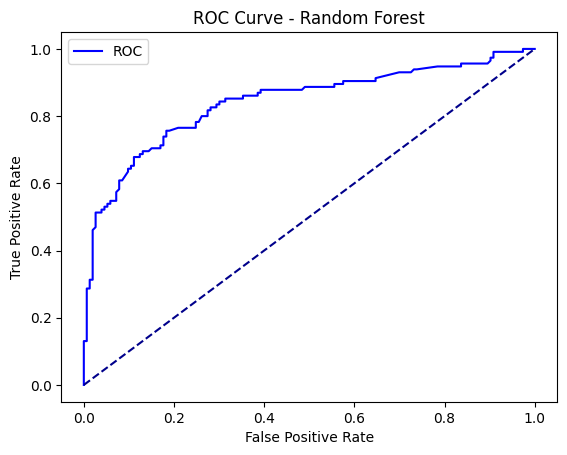

AUC Score:  0.780306905370844


In [51]:
fper, tper, thresholds = roc_curve(y_validation, y_pred_prob_rf) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()
auc_rf = roc_auc_score(y_validation, y_pred_rf)
print("AUC Score: ", auc_rf)

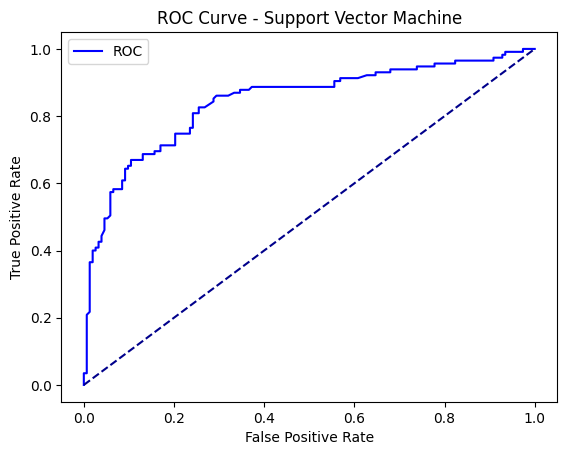

AUC Score:  0.7824950269963059


In [52]:
fper, tper, thresholds = roc_curve(y_validation, y_pred_prob_svc) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Machine')
plt.legend()
plt.show()
auc_svc = roc_auc_score(y_validation, y_pred_svc)
print("AUC Score: ", auc_svc)

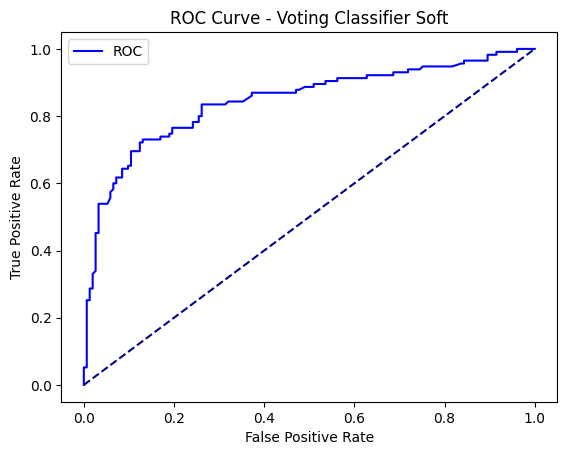

AUC Score:  0.7781472009093493


In [53]:
fper, tper, thresholds = roc_curve(y_validation, y_pred_prob_vc_soft) 
plt.plot(fper, tper, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier Soft')
plt.legend()
plt.show()
auc_vc_soft = roc_auc_score(y_validation, y_pred_vc_soft)
print("AUC Score: ", auc_vc_soft)

In [54]:
auc_vc_hard = roc_auc_score(y_validation, y_pred_vc_hard)
print("AUC Score: ", auc_vc_hard)

AUC Score:  0.7868428530832624


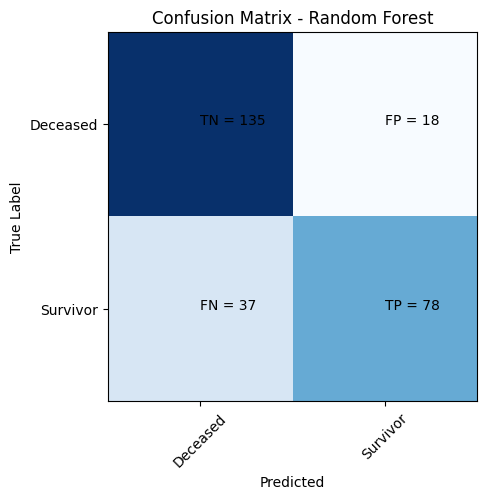

In [55]:
confusion_matrix_rf = confusion_matrix(y_true=y_validation, y_pred=y_pred_rf)
plt.clf()
plt.imshow(confusion_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Deceased','Survivor']
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix_rf[i][j]))
plt.show()

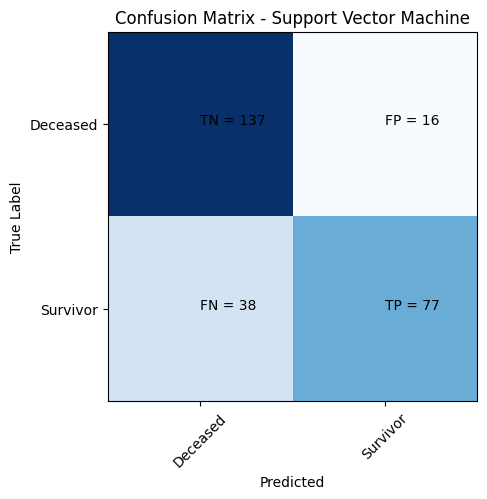

In [56]:
confusion_matrix_svc = confusion_matrix(y_true=y_validation, y_pred=y_pred_svc)
plt.clf()
plt.imshow(confusion_matrix_svc, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Deceased','Survivor']
plt.title('Confusion Matrix - Support Vector Machine')
plt.ylabel('True Label')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix_svc[i][j]))
plt.show()

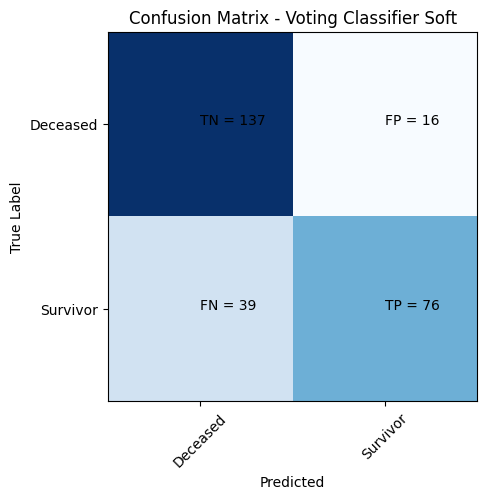

In [57]:
confusion_matrix_vc_soft = confusion_matrix(y_true=y_validation, y_pred=y_pred_vc_soft)
plt.subplot(1,2,1)
plt.clf()
plt.imshow(confusion_matrix_vc_soft, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Deceased','Survivor']
plt.title('Confusion Matrix - Voting Classifier Soft')
plt.ylabel('True Label')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix_vc_soft[i][j]))
plt.show()

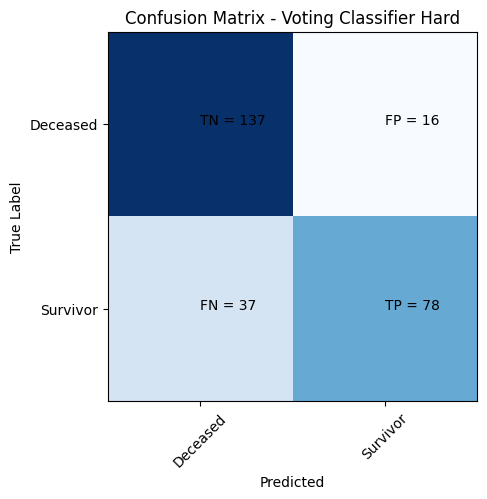

In [58]:
confuaion_matrix_vc_hard = confusion_matrix(y_true=y_validation, y_pred=y_pred_vc_hard)
plt.clf()
plt.imshow(confuaion_matrix_vc_hard, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Deceased','Survivor']
plt.title('Confusion Matrix - Voting Classifier Hard')
plt.ylabel('True Label')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confuaion_matrix_vc_hard[i][j]))
plt.show()

In [59]:
print('The accuracy of the Random Forest model is: %.3f' % precision_score(y_validation, y_pred_rf))
print('The recall of the Random Forest model is: %.3f' % recall_score(y_validation, y_pred_rf))
print('The F1 score of the Random Forest model is: %.3f' % f1_score(y_validation, y_pred_rf))

The accuracy of the Random Forest model is: 0.812
The recall of the Random Forest model is: 0.678
The F1 score of the Random Forest model is: 0.739


In [60]:
print('The accuracy of the Support Vector Machine model is: %.3f' % precision_score(y_validation, y_pred_svc))
print('The recall of the Support Vector Machine model is: %.3f' % recall_score(y_validation, y_pred_svc))
print('The F1 score of the Support Vector Machine model is: %.3f' % f1_score(y_validation, y_pred_svc))

The accuracy of the Support Vector Machine model is: 0.828
The recall of the Support Vector Machine model is: 0.670
The F1 score of the Support Vector Machine model is: 0.740


In [61]:
print('The accuracy of the Hard Voting model is: %.3f' % precision_score(y_validation, y_pred_vc_hard))
print('The recall of the Hard Voting model is: %.3f' % recall_score(y_validation, y_pred_vc_hard))
print('The F1 score of the Hard Voting model is: %.3f' % f1_score(y_validation, y_pred_vc_hard))

The accuracy of the Hard Voting model is: 0.830
The recall of the Hard Voting model is: 0.678
The F1 score of the Hard Voting model is: 0.746


In [62]:
print('The accuracy of the Soft Voting model is: %.3f' % precision_score(y_validation, y_pred_vc_soft))
print('The recall of the Soft Voting model is: %.3f' % recall_score(y_validation, y_pred_vc_soft))
print('The F1 score of the Soft Voting model is: %.3f' % f1_score(y_validation, y_pred_vc_soft))

The accuracy of the Soft Voting model is: 0.826
The recall of the Soft Voting model is: 0.661
The F1 score of the Soft Voting model is: 0.734


In [63]:
knn_final = knn.best_estimator_
svc_final = svc.best_estimator_
rf_final = rf.best_estimator_

In [64]:
#I train the models on the entire training dataset.
svc_final.fit(X_train, y_train)
rf_final.fit(X_train, y_train)
vot_hard.fit(X_train, y_train)
vot_soft.fit(X_train, y_train)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [65]:
from tabulate import tabulate
headers = ["name", "score"]
values = sorted(zip(pd.DataFrame(X_train, columns = final_columns).columns, rf_final.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name        score
Title   0.320072
Sex     0.265658
Pclass  0.157166
Fare    0.0901044
Age     0.0737375
SibSp   0.0623934
Parch   0.0308693


In [66]:
predictions_y_rf = rf_final.predict(X_test).astype(int)
predictions_y_svc = svc_final.predict(X_test).astype(int)
predictions_y_knn = knn_final.predict(X_test).astype(int)
predictions_y_vc_soft =  vot_soft.predict(X_test).astype(int)
predictions_y_vc_hard = vot_hard.predict(X_test).astype(int)


[[1.         0.         0.44736842 ... 0.         0.33333333 0.        ]
 [1.         1.         0.61842105 ... 0.         0.33333333 0.5       ]
 [0.5        0.         0.81578947 ... 0.         0.33333333 0.        ]
 ...
 [1.         0.         0.5        ... 0.         0.33333333 0.        ]
 [1.         0.         0.5        ... 0.         0.33333333 0.        ]
 [1.         0.         0.5        ... 0.11111111 0.5        0.75      ]]
[[1.         0.         0.275      ... 0.         0.33333333 0.        ]
 [0.         1.         0.475      ... 0.         0.66666667 0.5       ]
 [1.         1.         0.325      ... 0.         0.33333333 0.25      ]
 ...
 [1.         1.         0.2375     ... 0.33333333 0.5        0.25      ]
 [0.         0.         0.325      ... 0.         0.5        0.        ]
 [1.         0.         0.4        ... 0.         0.33333333 0.        ]]


In [68]:
predictii_1 = {'PassengerId': test_data.PassengerId, 'Survived': predictions_y_rf}
submission = pd.DataFrame(data=predictii_1)

predictii_2 = {'PassengerId': test_data.PassengerId, 'Survived': predictions_y_vc_hard}
submission_2 = pd.DataFrame(data=predictii_2)

predictii_3 = {'PassengerId': test_data.PassengerId, 'Survived': predictions_y_vc_soft}
submission_3 = pd.DataFrame(data=predictii_3)

predictii_4 = {'PassengerId': test_data.PassengerId, 'Survived': predictions_y_svc}
submission_4 = pd.DataFrame(data=predictii_4)

predictii_5 = {'PassengerId': test_data.PassengerId, 'Survived': predictions_y_knn}
submission_5 = pd.DataFrame(data=predictii_5)

In [69]:
submission.to_csv('submission_rf_noembarked.csv', index =False)
submission_2.to_csv('submission_vc_hard_noembarked.csv',index=False)
submission_3.to_csv('submission_vc_soft_noembarked.csv', index=False)
submission_4.to_csv('submission_svc_noembarked.csv', index=False)
submission_5.to_csv('submission_knn_noembarked.csv', index=False)